In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_parquet('fhvhv_tripdata_2021-01.parquet', engine='pyarrow')

In [3]:
df = df.drop(['hvfhs_license_num',"dispatching_base_num","originating_base_num",'airport_fee',"request_datetime","on_scene_datetime","pickup_datetime","dropoff_datetime","base_passenger_fare","tolls","bcf","sales_tax","congestion_surcharge","tips","driver_pay"], axis=1)

In [4]:
df.head(20)

,PULocationID,DOLocationID,trip_miles,trip_time,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,230,166,5.260,923,N,N,,N,N
1,152,167,3.650,1382,N,N,,N,N
2,233,142,3.510,849,N,N,,N,N
3,142,143,0.740,179,N,N,,N,N
4,143,78,9.200,1228,N,N,,N,N
5,88,42,9.725,2162,N,N,N,N,N
6,42,151,2.469,897,N,N,N,N,N
7,71,226,13.530,2157,N,N,,N,N
8,112,255,1.600,446,N,N,,N,N
9,255,232,3.200,800,N,N,,N,N


In [5]:
df['shared_request_flag'].replace(['N','Y'],[0,1],inplace=True)
print(df.iloc[:,1].values)

[166 167 142 ... 169  37   4]


In [6]:
df['shared_match_flag'].replace(['N','Y'],[0,1],inplace=True)
print(df.iloc[:,1].values)

[166 167 142 ... 169  37   4]


In [7]:
df['access_a_ride_flag'].replace(['N','Y'],[0,1],inplace=True)
print(df.iloc[:,1].values)

[166 167 142 ... 169  37   4]


In [8]:
df['wav_request_flag'].replace(['N','Y'],[0,1],inplace=True)
print(df.iloc[:,1].values)

[166 167 142 ... 169  37   4]


In [9]:
df['wav_match_flag'].replace(['N','Y'],[0,1],inplace=True)
print(df.iloc[:,1].values)

[166 167 142 ... 169  37   4]


In [10]:
df.head(10)

,PULocationID,DOLocationID,trip_miles,trip_time,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,230,166,5.260,923,0,0,,0,0
1,152,167,3.650,1382,0,0,,0,0
2,233,142,3.510,849,0,0,,0,0
3,142,143,0.740,179,0,0,,0,0
4,143,78,9.200,1228,0,0,,0,0
5,88,42,9.725,2162,0,0,0,0,0
6,42,151,2.469,897,0,0,0,0,0
7,71,226,13.530,2157,0,0,,0,0
8,112,255,1.600,446,0,0,,0,0
9,255,232,3.200,800,0,0,,0,0


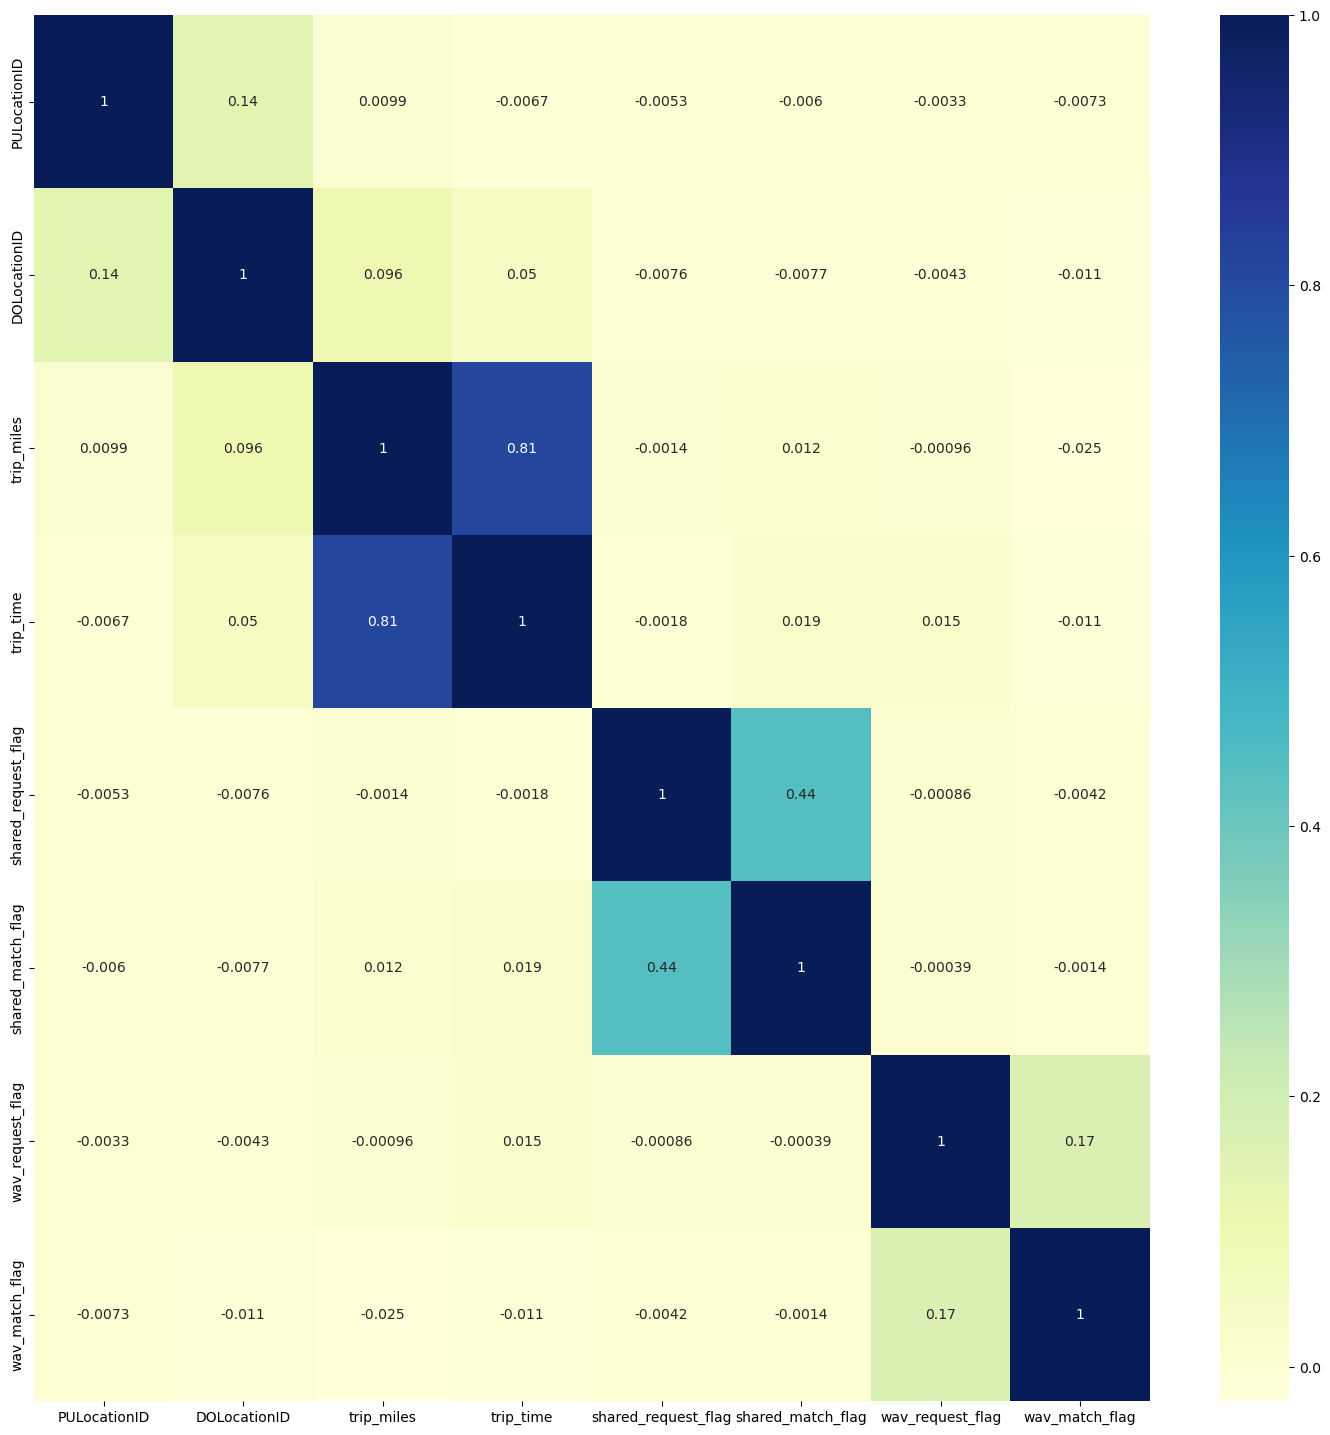

Index(['PULocationID', 'DOLocationID', 'trip_miles', 'trip_time',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [11]:
plt.subplots(figsize=(18,18))
dataplot= sb.heatmap(df.corr(), cmap="YlGnBu",annot=True) 
plt.show()
df.columns

Top  features for target 1: ['wav_match_flag', 'wav_request_flag', 'trip_miles', 'trip_time', 'DOLocationID']


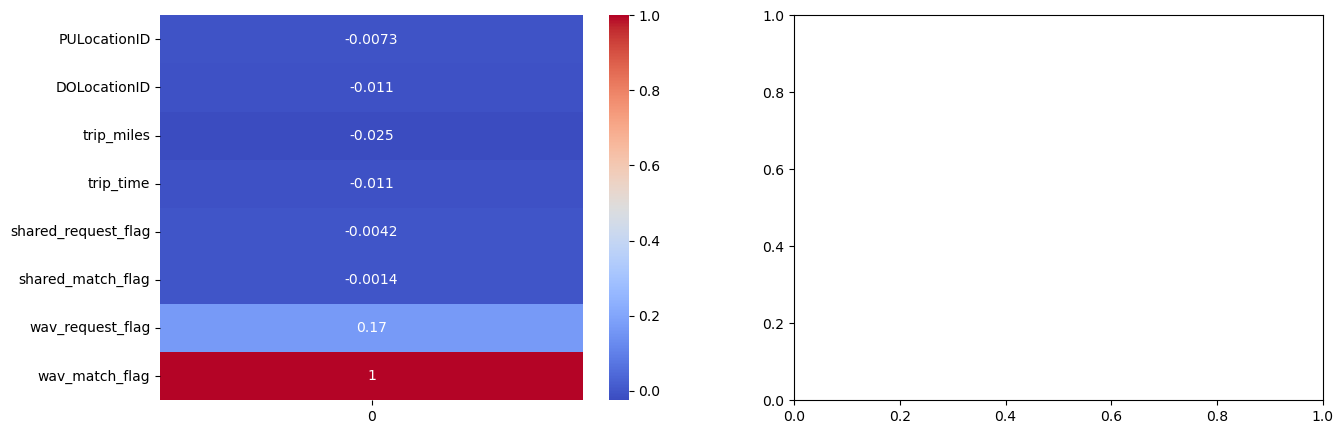

In [12]:
corr_matrix_target1 = df.corrwith(df['wav_match_flag'])

# Plot the heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.heatmap(corr_matrix_target1.to_frame(), annot=True, cmap='coolwarm', ax=ax[0])

# Find the features with the highest correlation for each target
top_n_features_target1 = corr_matrix_target1.abs().sort_values(ascending=False).head().index.tolist()

# Print the top features
print(f"Top  features for target 1: {top_n_features_target1}")

In [13]:
X = df[['PULocationID','DOLocationID','trip_miles','trip_time','wav_request_flag']]
y = df['wav_match_flag']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate recall score
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.9532190113423471
Precision: 0.9981474620229714
Recall: 0.03123387727891945
F1 score: 0.060572334361983775
Confusion matrix:
 [[3400026      10]
 [ 167117    5388]]


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create logistic regression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = logreg.predict(X_train)

# Calculate accuracy score on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data:", accuracy_train)

# Calculate precision score on training data
precision_train = precision_score(y_train, y_pred_train)
print("Precision on training data:", precision_train)

# Calculate recall score on training data
recall_train = recall_score(y_train, y_pred_train)
print("Recall on training data:", recall_train)

# Calculate F1 score on training data
f1_train = f1_score(y_train, y_pred_train)
print("F1 score on training data:", f1_train)

# Calculate confusion matrix on training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix on training data:\n", conf_matrix_train)


Accuracy on training data: 0.9515848687254579
Precision on training data: 0.0975609756097561
Recall on training data: 9.911981603362143e-06
F1 score on training data: 1.9821949340052972e-05
Confusion matrix on training data:
 [[7932338      37]
 [ 403548       4]]


In [18]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, y_pred)
print("Precision: ", precision)

Precision:  0.9981474620229714


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print("Performance of Testing\n")

r2 = r2_score(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared score:", r2) 
adj_r2_test = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
print(f'Testing adjusted R2 score: {adj_r2_test:.3f}')

print("\nPerformance of Training\n")
y_predi = model.predict(X_train)
r2i = r2_score(Y_train, y_predi)
msei = mean_squared_error(Y_train, y_predi)
print("Mean Squared Error:", msei)
print("R-squared score:", r2i) 
adj_r2_train = 1 - (1 - r2i) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)
print(f'Training adjusted R2 score: {adj_r2_train:.3f}')

Performance of Testing

Mean Squared Error: 0.10090454680731631
R-squared score: -1.195735262847223
Testing adjusted R2 score: -1.196

Performance of Training

Mean Squared Error: 0.00037889407300871757
R-squared score: 0.9917803888956
Training adjusted R2 score: 0.992


In [20]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('sharing of cab.pickle')
print(projectabspathname)
projectname = 'sharing of cab.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

C:\Users\Shabeeh Shakkir\Desktop\suyati\sharing of cab.pickle
